In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('conhecimento.csv')
df['dia'] = df.id_cena.str[-3:].astype(int)

id_cena = np.random.choice(df.id_cena, 1, replace=False)[0]
dia = int(id_cena[-3:])
print(df.shape, dia, id_cena)

teste_original = df[df.id_cena== id_cena].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0
print(len(teste_original))

# Modelo
modelo = df[df.dia.isin(range(dia-90, dia+90))].copy()

print(len(modelo))
print(modelo.verifica.value_counts())

(388551, 15) 123 LS82210672016123
1410
229831
3    166258
1     63573
Name: verifica, dtype: int64


In [4]:
y_pred = classificacao.classifica(modelo, teste)
y_true = teste_original.sort_values('id').reset_index(drop=True)

Criando classificador RF
RF - Classifica dado usando as colunas ['medianb5', 'nbrl']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais


Confusion matrix, without normalization
[[257 626]
 [  6 521]]
Normalized confusion matrix
[[0.29105323 0.70894677]
 [0.0113852  0.9886148 ]]


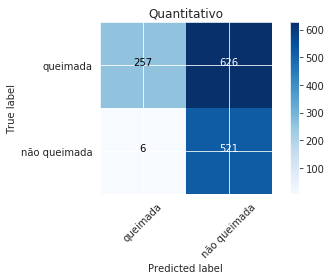

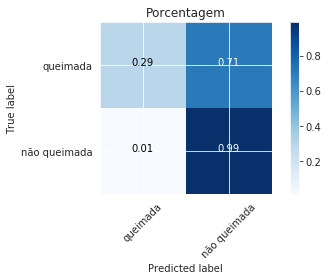

Acertos: 778/1410 (55%)
LS82210672016123


In [5]:
classificacao.mostra_resultado(y_pred, y_true)
print(id_cena)